In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **Resume Screening with Machine Learning**

* ***What is Resume Screening -*** 
Resume screening is the process of evaluating job applications to identify the candidates who possess the qualifications, skills, and experience required for a particular job role.

* ***Need -*** 
During resume screening, candidates are typically ranked or categorized based on their suitability for the job, and those who meet the initial criteria may proceed to the next stage of the hiring process, such as interviews or assessments. This process helps employers efficiently manage a large volume of job applications and identify the most promising candidates for further consideration.

* ***Task -*** 
The task is to perform resume screening using machine learning. Dataset(https://www.kaggle.com/datasets/gauravduttakiit/resume-dataset).
The mentioned dataset contains a csv file with 962 entries and 2 columns.
Column-1 - Category: Specifies to which category(Data Science, Java, Testing, ETL, etc) a resume belongs.
Column-2 - Resume: Holds the data like education, work experience, skills and other relevant qualifications.
Our task is to classify into one of the given category based on the resume data.

**This is a multiclass-classifcation machine learning problem.**

# 1. **Load Data into Dataframe**

In [1]:
import pandas as pd
resume_df = pd.read_csv('/kaggle/input/resume-dataset/UpdatedResumeDataSet.csv')

# **Exploratory Data Analysis**

In [2]:
resume_df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [3]:
resume_df.describe()

,Category,Resume
count,962,962
unique,25,166
top,Java Developer,"Technical Skills Web Technologies: Angular JS,..."
freq,84,18


In [4]:
resume_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [5]:
resume_df.columns

Index(['Category', 'Resume'], dtype='object')

In [6]:
resume_df.columns.value_counts()

Category    1
Resume      1
Name: count, dtype: int64

In [7]:
resume_df.shape

(962, 2)

In [8]:
resume_df.columns.dtype

dtype('O')

In [9]:
resume_df.isnull().sum()

Category    0
Resume      0
dtype: int64

In [10]:
resume_df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

In [11]:
resume_df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

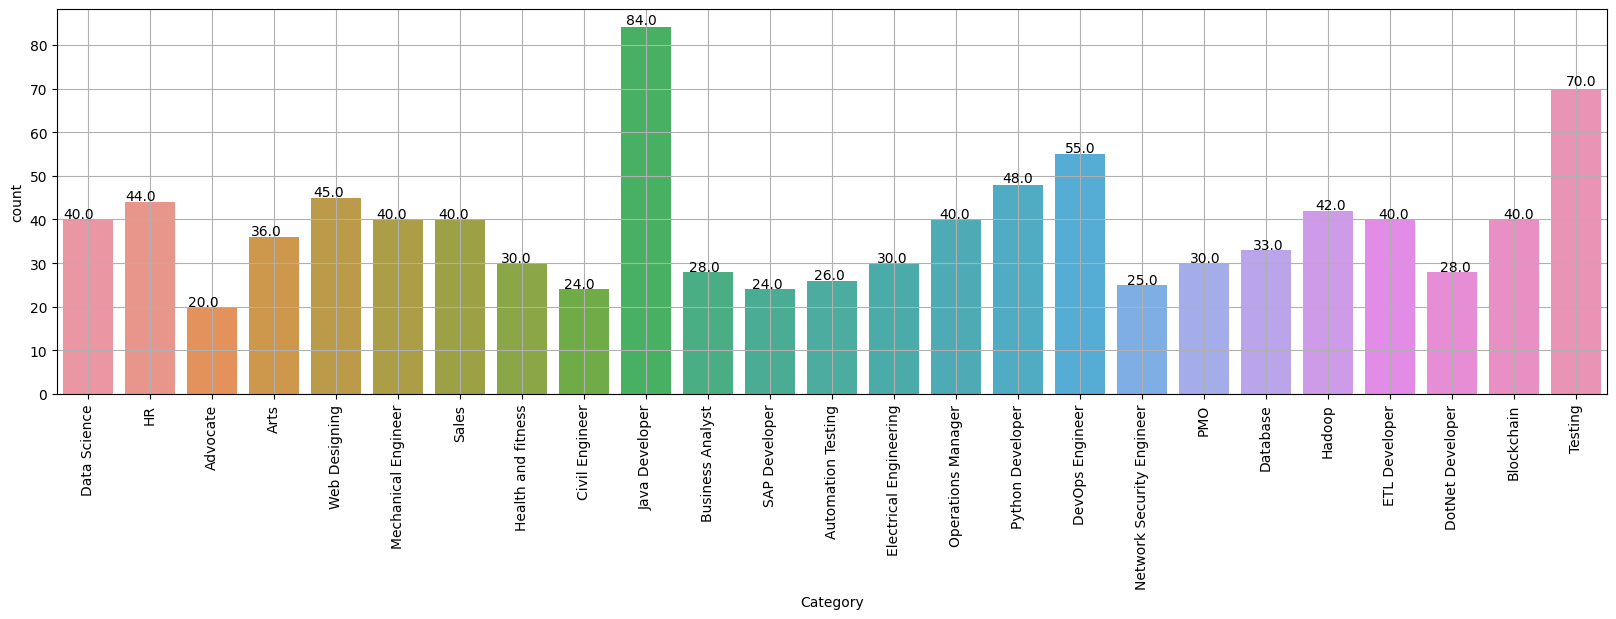

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.figure(figsize=(20, 5))
plt.xticks(rotation=90)
ax=sns.countplot(x="Category", data=resume_df)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()*1.01, p.get_height()*1.01))
plt.grid()

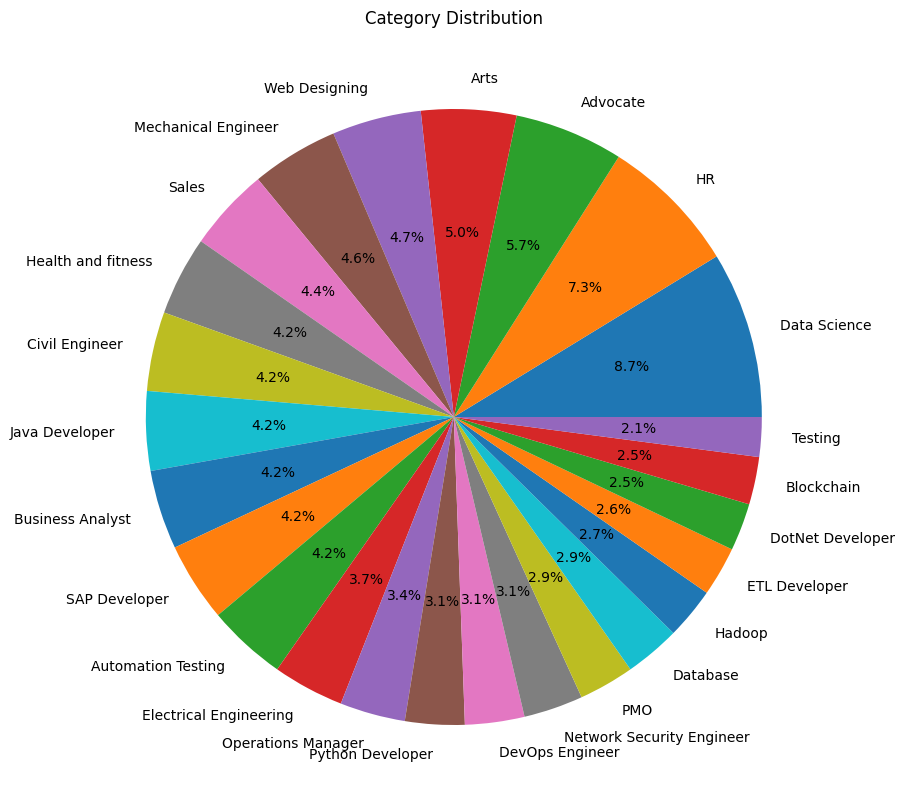

In [13]:
targetcounts = resume_df['Category'].value_counts()
targetlabels = resume_df['Category'].unique()
plt.figure(figsize=(25,10))
plt.pie(targetcounts, labels=targetlabels, autopct='%1.1f%%')
plt.title('Category Distribution')
plt.show()

In [14]:
#Clening the Resume Column and adding a new cloumn called cleaned_resume
import re
def cleanResume(resumeText):
    resumeText = re.sub('http\S+\s*',' ',resumeText) #to remove urls
    resumeText = re.sub('#\S+',' ',resumeText) #remove hashtags
    resumeText = re.sub('@\S+',' ',resumeText) #remove mentions
    resumeText = re.sub('RT|cc',' ',resumeText) #remove RT or cc
    resumeText = re.sub(r'[^\x00-\x7f]',r' ',resumeText) #remove non ascii characters
    resumeText = re.sub('\s+',' ',resumeText) #remove extra white spaces
    resumeText = re.sub('[%s]'%re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""),' ',resumeText) #remove punctuations
    return resumeText
    
resume_df['cleaned_resume'] = resume_df.Resume.apply(lambda x: cleanResume(x))

In [15]:
resume_df.head()

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control Syste...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Hary...


In [16]:
resume_df_copy = resume_df.copy()

In [17]:
resume_df_copy.head()

,Category,Resume,cleaned_resume
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control Syste...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Hary...


In [19]:
#Removal of stopwords
import nltk
from nltk.corpus import stopwords
import string

oneSetOfStopwords=set(stopwords.words('english')+['``',"''"])
totalWords=[]
Sentences = resume_df_copy['cleaned_resume'].values
for records in Sentences:
    requiredWords = nltk.word_tokenize(records)
    for word in requiredWords:
        if word not in oneSetOfStopwords and word not in string.punctuation:
            totalWords.append(word)
            
wordfreqdis = nltk.FreqDist(totalWords)
most_common = wordfreqdis.most_common(50)
most_common



[('Exprience', 3829),
 ('months', 3233),
 ('company', 3130),
 ('Details', 2967),
 ('description', 2634),
 ('1', 2134),
 ('Project', 1808),
 ('project', 1579),
 ('6', 1499),
 ('data', 1438),
 ('team', 1424),
 ('Maharashtra', 1385),
 ('year', 1244),
 ('Less', 1137),
 ('January', 1086),
 ('using', 1041),
 ('Skill', 1018),
 ('Pune', 1016),
 ('Management', 1010),
 ('SQL', 990),
 ('Ltd', 934),
 ('management', 927),
 ('C', 896),
 ('Engineering', 855),
 ('Education', 833),
 ('Developer', 806),
 ('Java', 773),
 ('2', 754),
 ('development', 752),
 ('monthsCompany', 746),
 ('Pvt', 730),
 ('application', 727),
 ('System', 715),
 ('reports', 697),
 ('business', 696),
 ('India', 693),
 ('requirements', 693),
 ('I', 690),
 ('various', 688),
 ('A', 688),
 ('Data', 674),
 ('The', 672),
 ('University', 656),
 ('process', 648),
 ('Testing', 646),
 ('test', 638),
 ('Responsibilities', 637),
 ('system', 636),
 ('testing', 634),
 ('Software', 632)]

In [20]:
#label encoding for category column
from sklearn.preprocessing import LabelEncoder
var_mod = ['Category']
le = LabelEncoder()
for i in var_mod:
    resume_df_copy[i] = le.fit_transform(resume_df_copy[i])

In [21]:
resume_df_copy.head()

,Category,Resume,cleaned_resume
0,6,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas...
1,6,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,6,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control Syste...
3,6,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,6,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Hary...


In [22]:
resume_df_copy.Category.value_counts()

Category
15    84
23    70
8     55
20    48
24    45
12    44
13    42
3     40
10    40
18    40
6     40
22    40
16    40
1     36
7     33
11    30
14    30
19    30
4     28
9     28
2     26
17    25
21    24
5     24
0     20
Name: count, dtype: int64

In [23]:
#Feature extraction for cleaned_resume column, converting text into number by calculating 
#Term Frequency and Inverse Document Frequency
from sklearn.feature_extraction.text import TfidfVectorizer

requiredText = resume_df_copy['cleaned_resume'].values
requiredTarget = resume_df_copy['Category'].values

word_vectorizer = TfidfVectorizer(sublinear_tf = True, stop_words='english')
word_vectorizer.fit(requiredText)
wordFeatures = word_vectorizer.transform(requiredText)


# **Splitting data for training and testing**

In [24]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(wordFeatures, requiredTarget, random_state=42, test_size=0.3, shuffle = True, stratify = requiredTarget)
print(x_train.shape)
print(x_test.shape)

(673, 7351)
(289, 7351)


# **Building and Training Classification Model**

In [25]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier

clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(x_train, y_train)
prediction = clf.predict(x_test)


# **Calculating Accuracy**

In [26]:
import sklearn
accuracy = sklearn.metrics.accuracy_score(y_test, prediction)*100
print("Accuracy: ", accuracy)

Accuracy:  98.6159169550173


In [27]:
print(sklearn.metrics.classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       1.00      1.00      1.00        11
           2       0.86      0.75      0.80         8
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00         7
           6       1.00      1.00      1.00        12
           7       1.00      1.00      1.00        10
           8       1.00      0.94      0.97        17
           9       1.00      1.00      1.00         8
          10       1.00      1.00      1.00        12
          11       0.90      1.00      0.95         9
          12       0.93      1.00      0.96        13
          13       1.00      1.00      1.00        13
          14       1.00      1.00      1.00         9
          15       1.00      1.00      1.00        25
          16       1.00      1.00      1.00        12
          17       1.00    